# IE6511 Homework 7
Done by: Aloisius Stephen and Yang Xiaozhou

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pySOT import *
from poap.controller import SerialController, ThreadController, BasicWorkerThread
from pySOT import Ackley, SyncStrategyNoConstraints, \
    SymmetricLatinHypercube, RBFInterpolant, CubicKernel, \
    LinearTail, CandidateDYCORS

%matplotlib inline

np.set_printoptions(precision=3)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Performances of DDS, LMSRBF (PySOT) and G-MSRBF (PySOT) on the “Ackley” function, within a limited evaluation budget 

DDS function taken from HW4

In [35]:
def DDS(x_min,x_max,m,x_initial):
    r=0.2
    sBest=x_initial
    sCur=x_initial
    CostBest=data.objfunction(sBest)
    dimen=np.size(x_initial)
    Cost_iter = np.zeros(m)
    Iter = np.zeros(m)
    x_range=x_max-x_min
    k=0
    
    for i in range(0,m):
        sCur=sBest
        Iter[i] = np.int(i+1)
        Cost_iter[i]=CostBest
        for j in range(0,dimen):
            if (np.random.rand(1)<(1-(np.log(i+1)/np.log(m+1)))):
                k=k+1
                sCur[j]=sBest[j]+np.random.randn(1,1)*r*(x_range)
                if(sCur[j]<x_min):
                    sCur[j]=x_min+(x_min-sCur[j])
                    if(sCur[j]>x_max):
                        sCur[j]=x_min
                        
                if(sCur[j]>x_max):
                    sCur[j]=x_max-(sCur[j]-x_max)
                    if(sCur[j]<x_min):
                        sCur[j]=x_max
        
            if(k==0):
                index=np.random.randint(0,dimen)
                sCur[index]=sBest[index]+np.random.randn(1,1)*r*(x_range)
                if(sCur[index]<x_min):
                    sCur[index]=x_min+(x_min-sCur[index])
                    if(sCur[index]>x_max):
                        sCur[index]=x_min
                            
                if(sCur[index]>x_max):
                    sCur[index]=x_max-(sCur[index]-x_max)
                    if(sCur[index]<x_min):
                        sCur[index]=x_max
            k=0
            if(data.objfunction(sCur)>CostBest):
                sBest=sCur
                CostBest=data.objfunction(sBest)
    sol = pd.DataFrame(np.column_stack((Iter,Cost_iter)), columns = ['Iteration','Cost'])
    return sol 

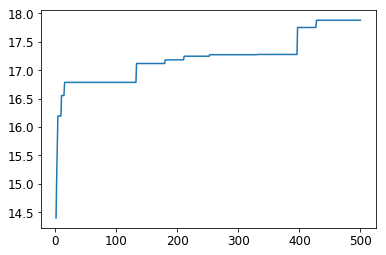

In [44]:
data = Ackley(dim=10)

x_init = 10*np.random.rand(data.dim)
trial = 20
maxeval = 500
Trial_best = DDS(0,10,maxeval,x_init)
plt.plot(Trial_best.Iteration, Trial_best.Cost)

In [46]:
print("\nNumber of threads: 4")
print("Maximum number of evaluations: 500")
print("Sampling method: CandidateSRBF")
print("Experimental design: Symmetric Latin Hypercube")
print("Surrogate: Cubic RBF")

nthreads = 4
maxeval = 500
nsamples = nthreads

print(data.info)

# Create a strategy and a controller
controller = ThreadController()
controller.strategy = \
    SyncStrategyNoConstraints(
        worker_id=0, data=data,
        maxeval=maxeval, nsamples=nsamples,
        exp_design=SymmetricLatinHypercube(dim=data.dim, npts=2*(data.dim+1)),
        response_surface=RBFInterpolant(kernel=CubicKernel, tail=LinearTail,
                                        maxp=maxeval),
        sampling_method=CandidateSRBF(data=data, numcand=100*data.dim))

# Launch the threads and give them access to the objective function
for _ in range(nthreads):
    worker = BasicWorkerThread(controller, data.objfunction)
    controller.launch_worker(worker)

# Run the optimization strategy
result = controller.run()

print('Best value found: {0}'.format(result.value))
print('Best solution found: {0}\n'.format(
    np.array_str(result.params[0], max_line_width=np.inf,
                 precision=5, suppress_small=True)))


Number of threads: 4
Maximum number of evaluations: 500
Sampling method: CandidateSRBF
Experimental design: Symmetric Latin Hypercube
Surrogate: Cubic RBF
10-dimensional Ackley function 
Global optimum: f(0,0,...,0) = 0
Best value found: 2.1207306059893374
Best solution found: [-0.25089 -0.30296  0.11976 -0.09156 -0.10882  0.20709 -0.20587 -0.12798  0.08258  0.36607]



In [48]:
print("\nNumber of threads: 4")
print("Maximum number of evaluations: 500")
print("Sampling method: CandidateSRBF")
print("Experimental design: Symmetric Latin Hypercube")
print("Surrogate: Cubic RBF")

nthreads = 4
maxeval = 500
nsamples = nthreads

print(data.info)

# Create a strategy and a controller
controller = ThreadController()
controller.strategy = \
    SyncStrategyNoConstraints(
        worker_id=0, data=data,
        maxeval=maxeval, nsamples=nsamples,
        exp_design=SymmetricLatinHypercube(dim=data.dim, npts=2*(data.dim+1)),
        response_surface=RBFInterpolant(kernel=CubicKernel, tail=LinearTail,
                                        maxp=maxeval),
        sampling_method=CandidateSRBF(data=data, numcand=100*data.dim))

# Launch the threads and give them access to the objective function
for _ in range(nthreads):
    worker = BasicWorkerThread(controller, data.objfunction)
    controller.launch_worker(worker)

# Run the optimization strategy
result = controller.run()

print('Best value found: {0}'.format(result.value))
print('Best solution found: {0}\n'.format(
    np.array_str(result.params[0], max_line_width=np.inf,
                 precision=5, suppress_small=True)))

2.1207306059893374